Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the CIFAR-10 dataset (using it as a face dataset proxy for demonstration)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Function to create a CNN model

In [3]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train multiple models for ensemble

In [4]:
models = [create_model() for _ in range(3)]  # Creating 3 different CNN models
histories = []

for i, model in enumerate(models):
    print(f"Training model {i+1}...")
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    histories.append(history)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model 1...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3052 - loss: 1.8736 - val_accuracy: 0.5239 - val_loss: 1.3273
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.4901 - loss: 1.4223 - val_accuracy: 0.5944 - val_loss: 1.1730
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.5469 - loss: 1.2645 - val_accuracy: 0.6169 - val_loss: 1.1052
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.5920 - loss: 1.1595 - val_accuracy: 0.6508 - val_loss: 1.0081
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6113 - loss: 1.1012 - val_accuracy: 0.6616 - val_loss: 0.9704
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.6380 - loss: 1.0382 - val_accuracy: 0.6736 - val_loss: 0.9498
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.6487 - loss: 0.9994 - val_accuracy: 0.6713 - val_loss: 0.9518
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.66

Collect predictions from all models

In [5]:
predictions = [model.predict(x_test) for model in models]
ensemble_predictions = np.mean(predictions, axis=0)  # Averaging predictions
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_predictions, axis=1))
print(f"Ensemble Model Accuracy: {ensemble_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Ensemble Model Accuracy: 72.58%


Visualization of training loss for all models

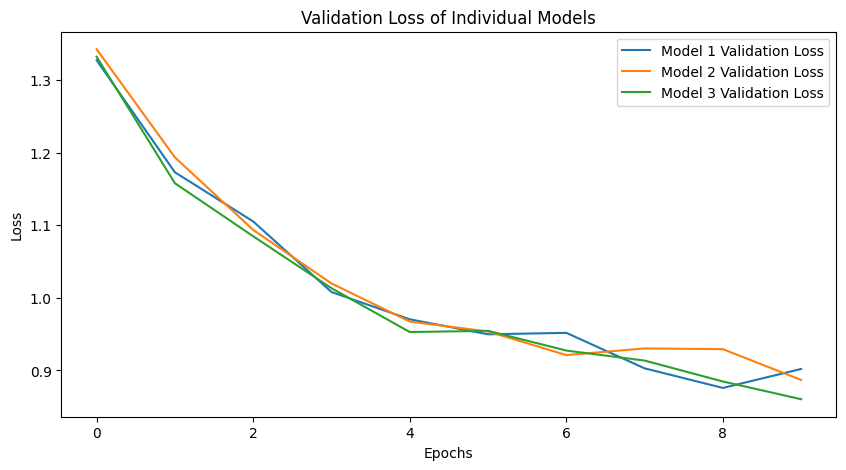

In [6]:
plt.figure(figsize=(10, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Model {i+1} Validation Loss')
plt.title('Validation Loss of Individual Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- We trained multiple CNN models separately.
- Their predictions were combined using an **Ensemble Voting Method** (averaging softmax outputs).
- This helps in **reducing variance** and **improving generalization**.
- Regularization occurs as different models learn different features, reducing overfitting.

      Ensemble Formula:
      Final Prediction = (Model_1 + Model_2 + ... + Model_n) / n
      This ensures a balanced decision-making process, avoiding reliance on a single model's bias.